###  EDA
#### 1.1 labels 
- Multilabel classfication problem. For example, one photo contains both 'argriculture', 'partly_cloudy','water'tags
- Highly imbalanced (Most tags contains primary, while most tags appeared less than .05% of the photos)

Set tensorflow environment
```python
source activate tensorflow_p36
```

Cloudy should have no other labels, but there may be labeling errors

In [2]:
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
from collections import OrderedDict

In [3]:
kaggle_path = '/home/ubuntu/.kaggle/competitions/planet-understanding-the-amazon-from-space/'
labels = pd.read_csv(kaggle_path+'train_v2.csv')

In [4]:
# len(labels[labels.tags=='cloudy'])
# labels[labels.tags.str.contains('cloudy')]

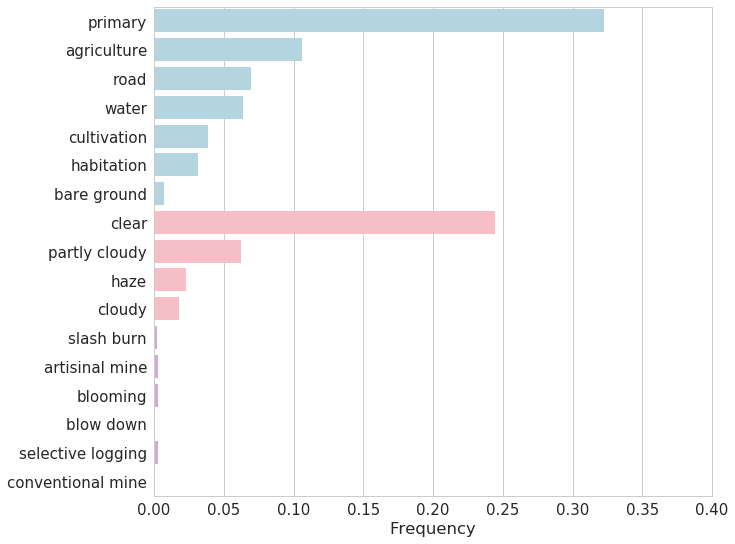

In [5]:

def plot_tag_distribution():
    texts = labels.tags.tolist()
    tokenizer = Tokenizer(filters='"(),./:~')
    tokenizer.fit_on_texts(texts)
    tags = tokenizer.word_docs
    myorder = ['primary', 'agriculture','road','water', 'cultivation', 'habitation','bare_ground', 
               'clear', 'partly_cloudy','haze', 'cloudy',  
               'slash_burn', 'artisinal_mine', 'blooming', 'blow_down','selective_logging','conventional_mine', ]
    tags = OrderedDict((k, tags[k]) for k in myorder)
    y = [i.replace('_',' ') for i in tags.keys()]
    sns.set(style="whitegrid",font_scale=1.5)
    f, ax = plt.subplots(figsize=(10, 9))
    sns.set_color_codes("pastel")
    colour = ['lightblue']*17
    colour[7:11] = ['lightpink']*4
    colour[11:] = ['plum']*6
    sns.barplot(x=np.array(list(tags.values()))/sum(list(tags.values())),
                y=y, 
                color="b",
                orient = "h",
                palette=colour
               )
    ax.set(xlim=(0, .4), ylabel="",
           xlabel="Frequency")    

    return tags
tags = plot_tag_distribution()

In [10]:
print ('haze vs clear ',tags['primary'],' : ',tags['agriculture'])
#                                                    'primary', 'agriculture', 'road', 'water','cultivation', 'habitation','bare_ground', 
#                     'conventional_mine', 'selective_logging', 'artisinal_mine', 'blooming','slash_burn', 'blow_down'
tags.keys()

haze vs clear  37513  :  12315


odict_keys(['primary', 'agriculture', 'road', 'water', 'cultivation', 'habitation', 'bare_ground', 'clear', 'partly_cloudy', 'haze', 'cloudy', 'slash_burn', 'artisinal_mine', 'blooming', 'blow_down', 'selective_logging', 'conventional_mine'])

#### Examples of photos
Display 20 photos at random choice

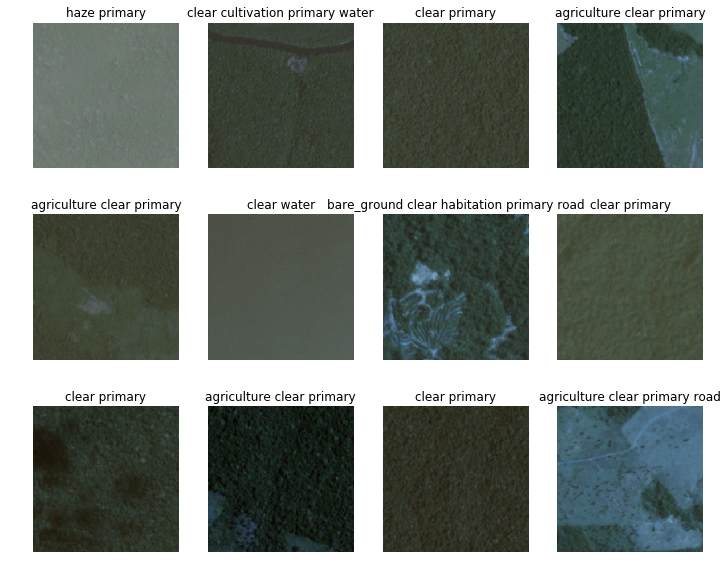

In [14]:
def display_photos(rows,columns):
    fig = plt.figure(figsize=(12, 10))
    for i in range(1, columns*rows +1):
        img_id = np.random.randint(20000)
        path = kaggle_path+f'train-jpg/train_{img_id}.jpg'
        img  = cv2.imread(path)
        ax = fig.add_subplot(rows, columns, i)
        ax.set_axis_off()
        ax.set_title(labels.tags[img_id])

        plt.imshow(img)
    plt.show()
        
display_photos(rows=3,columns=4)